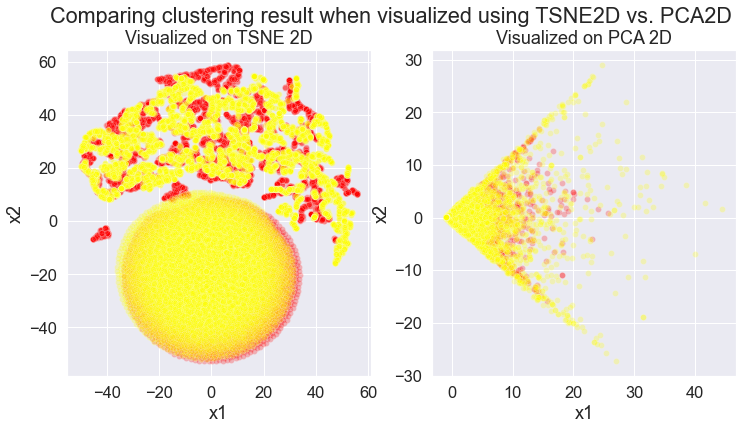

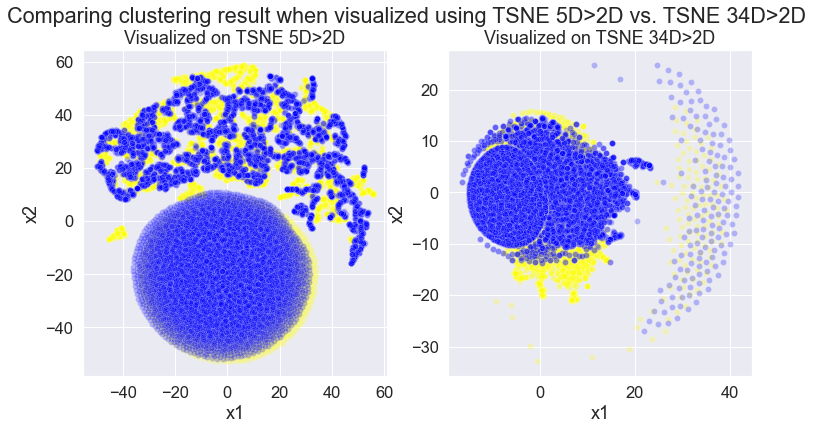

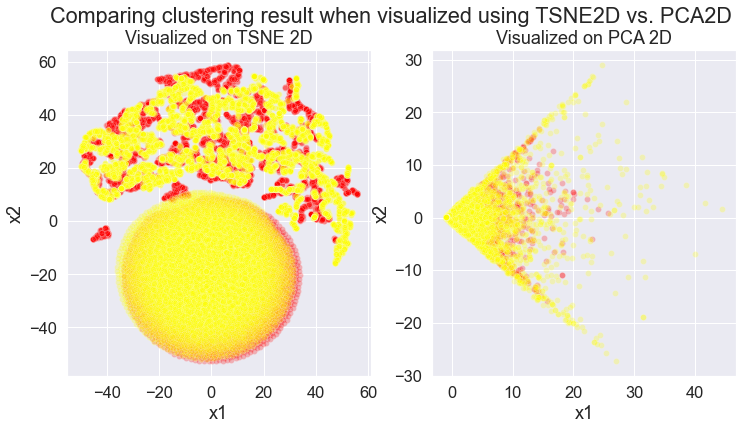

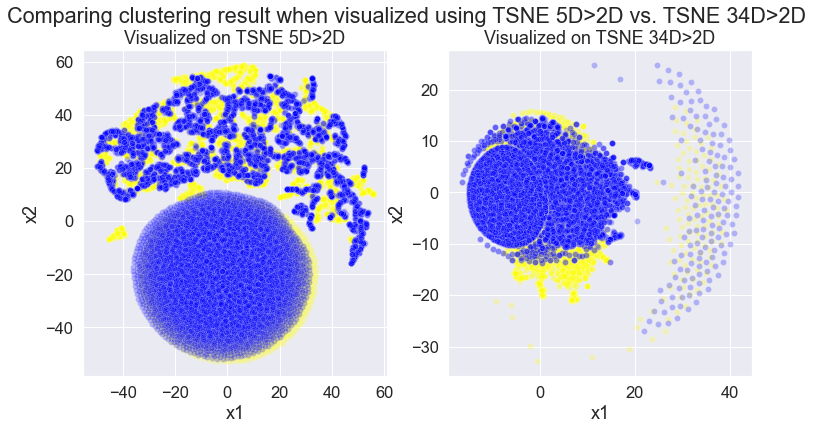

In [6]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
from os import listdir
from PIL import Image as PImage
import glob
from numpy import *
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation 
def load_mnist(path, kind='train', num= 0):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), num)

    return images, labels


X_test, y_test = load_mnist('C:\\Users\\khi\\jupyter\\convert_MNIST',
                              kind='t10k', num= 2304)
(x2_subset, y2_subset) = (X_test, y_test)


X_test, y_test = load_mnist('C:\\Users\\khi\\jupyter\\convert_MNIST_deep_learning_classified_eff',
                              kind='t10k', num= 6912)
(x4_subset, y4_subset) = (X_test, y_test)

# Utility function to visualize the outputs of PCA and t-SNE

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
RS = 123

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


pca_50 = PCA(n_components=5)
pca_result_50 = pca_50.fit_transform(x2_subset)

pca_50 = PCA(n_components=5)
pca_result_502 = pca_50.fit_transform(x4_subset)
#===============================================

# kmeans = KMeans(n_clusters=7)
# skillsPCA_labels = kmeans.fit_predict(pca_result_50)
dfskillsPCA = pd.DataFrame(pca_result_50)
dfskillsPCA['cluster'] = y2_subset
dfskillsPCA2 = pd.DataFrame(pca_result_502)
dfskillsPCA2['cluster'] = y4_subset
#===============================================
X = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = y2_subset
dftsne.columns = ['x1', 'x2', 'cluster']

X2 = dfskillsPCA2.iloc[:,:-1]
Xtsne2 = TSNE(n_components=2).fit_transform(X2)
dftsne2 = pd.DataFrame(Xtsne2)
dftsne2['cluster'] = y4_subset
dftsne2.columns = ['x1', 'x2', 'cluster']
# #===============================================

pca2 = PCA(n_components=2)
skillsPCA2_1 = pca2.fit_transform(x2_subset)
dfskillsPCA2_1 = pd.DataFrame(skillsPCA2_1)
dfskillsPCA2_1['cluster'] = y2_subset
dfskillsPCA2_1.columns =  ['x1', 'x2', 'cluster']

pca2_2 = PCA(n_components=2)
skillsPCA2_2= pca2_2.fit_transform(x4_subset)
dfskillsPCA2_2 = pd.DataFrame(skillsPCA2_2)
dfskillsPCA2_2['cluster'] = y4_subset
dfskillsPCA2_2.columns =  ['x1', 'x2', 'cluster']
#================================================


fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',color="red", legend="full",alpha=0.25,ax=ax[0])
sns.scatterplot(data=dftsne2,x='x1',y='x2',color="yellow", legend="full",alpha=0.25,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2_1,x='x1',y='x2',color="red",legend="full",alpha=0.25,ax=ax[1])
sns.scatterplot(data=dfskillsPCA2_2,x='x1',y='x2',color="yellow",legend="full",alpha=0.25,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

# # kmeans = KMeans(n_clusters=7)
# # clustering_ori = kmeans.fit_predict(x_subset)
# # color_dict = dict({0:'brown',
# #                   1:'green',
# #                   2: 'orange',
# #                     3 'red',
# #                     4: 'dodgerblue',
# #                    5: 'pink',
# #                     6: 'black'})

#================================================
dftsne2D = dftsne
dftsne2D['cluster'] = y2_subset

dftsne2D_2 = dftsne2
dftsne2D_2['cluster'] = y4_subset
#================================================

X = x2_subset
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsneFull = pd.DataFrame(Xtsne)
dftsneFull['cluster'] = y2_subset
dftsneFull.columns = ['x1', 'x2', 'cluster']


X2 = x4_subset
Xtsne2 = TSNE(n_components=2).fit_transform(X2)
dftsneFull2 = pd.DataFrame(Xtsne2)
dftsneFull2['cluster'] = y4_subset
dftsneFull2.columns = ['x1', 'x2', 'cluster']
#================================================

fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne2D,x='x1',y='x2',color= 'yellow', legend="full",alpha=0.25,ax=ax[0])
sns.scatterplot(data=dftsne2D_2,x='x1',y='x2',color= 'blue', legend="full",alpha=0.25,ax=ax[0])
ax[0].set_title('Visualized on TSNE 5D>2D')
sns.scatterplot(data=dftsneFull,x='x1',y='x2',color= 'yellow',legend="full",alpha=0.25,ax=ax[1])
sns.scatterplot(data=dftsneFull2,x='x1',y='x2',color= 'blue',legend="full",alpha=0.25,ax=ax[1])
ax[1].set_title('Visualized on TSNE 34D>2D')
fig.suptitle('Comparing clustering result when visualized using TSNE 5D>2D vs. TSNE 34D>2D')
display(fig)


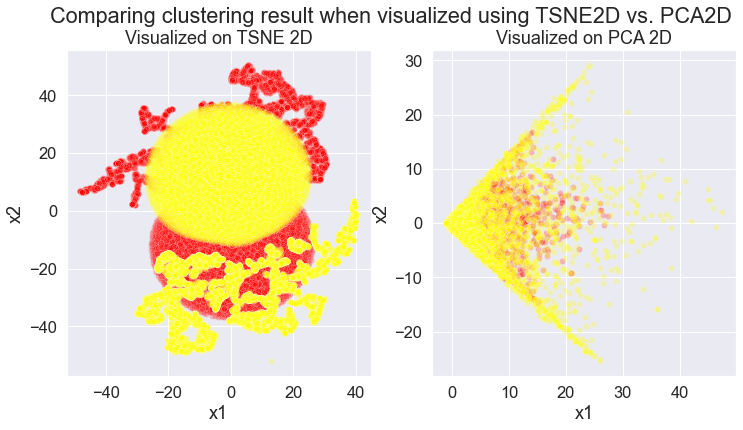

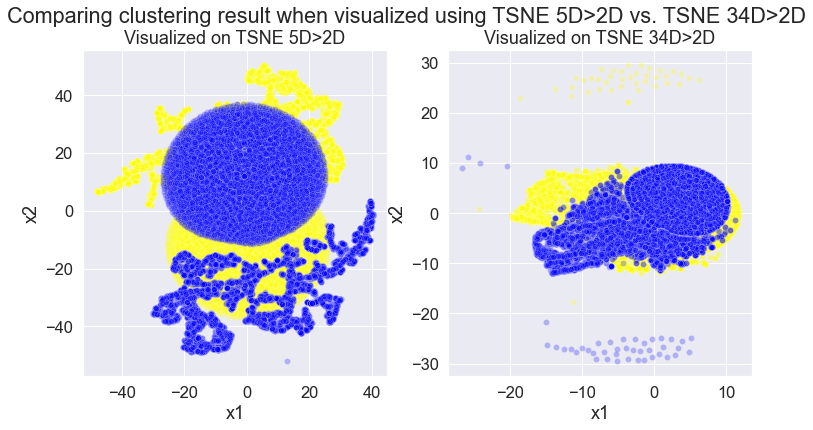

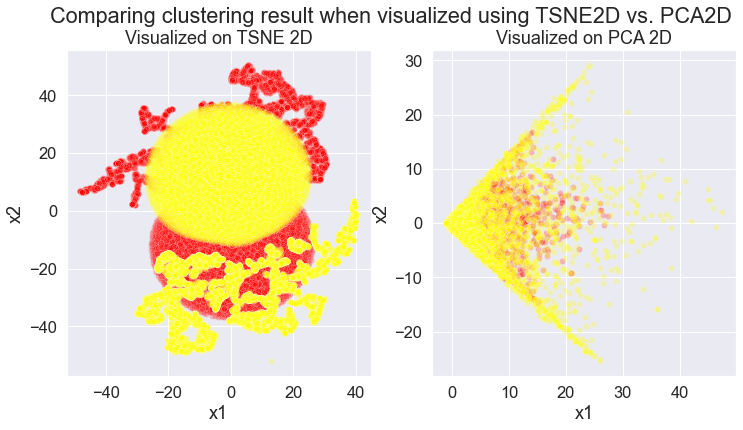

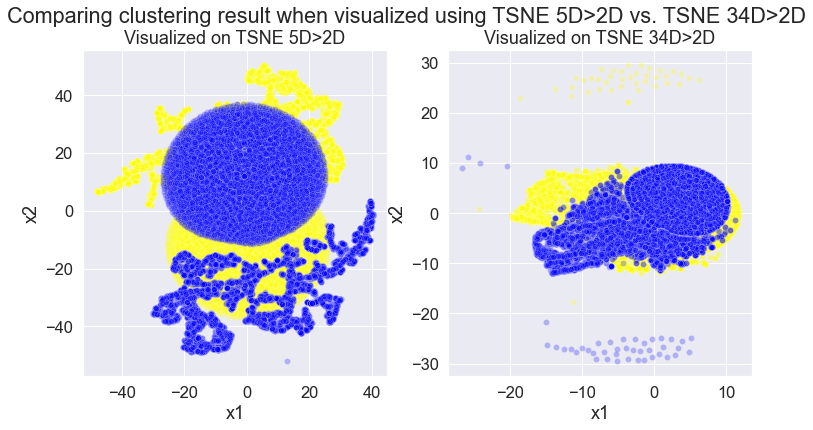

In [5]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
from os import listdir
from PIL import Image as PImage
import glob
from numpy import *
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation 
def load_mnist(path, kind='train', num= 0):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), num)

    return images, labels

X_train, y_train = load_mnist('C:\\Users\\khi\\jupyter\\convert_MNIST',
                              kind='train', num= 2304)

(x_subset, y_subset) = (X_train, y_train)


X_train, y_train = load_mnist('C:\\Users\\khi\\jupyter\\convert_MNIST_deep_learning_classified_eff',
                              kind='train', num= 6912)
(x3_subset, y3_subset) = (X_train, y_train)

# Utility function to visualize the outputs of PCA and t-SNE

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
RS = 123

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


pca_50 = PCA(n_components=5)
pca_result_50 = pca_50.fit_transform(x_subset)

pca_50 = PCA(n_components=5)
pca_result_502 = pca_50.fit_transform(x3_subset)
#===============================================

# kmeans = KMeans(n_clusters=7)
# skillsPCA_labels = kmeans.fit_predict(pca_result_50)
dfskillsPCA = pd.DataFrame(pca_result_50)
dfskillsPCA['cluster'] = y_subset
dfskillsPCA2 = pd.DataFrame(pca_result_502)
dfskillsPCA2['cluster'] = y3_subset
#===============================================
X = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = y_subset
dftsne.columns = ['x1', 'x2', 'cluster']

X2 = dfskillsPCA2.iloc[:,:-1]
Xtsne2 = TSNE(n_components=2).fit_transform(X2)
dftsne2 = pd.DataFrame(Xtsne2)
dftsne2['cluster'] = y3_subset
dftsne2.columns = ['x1', 'x2', 'cluster']
# #===============================================

pca2 = PCA(n_components=2)
skillsPCA2_1 = pca2.fit_transform(x_subset)
dfskillsPCA2_1 = pd.DataFrame(skillsPCA2_1)
dfskillsPCA2_1['cluster'] = y_subset
dfskillsPCA2_1.columns =  ['x1', 'x2', 'cluster']

pca2_2 = PCA(n_components=2)
skillsPCA2_2= pca2_2.fit_transform(x3_subset)
dfskillsPCA2_2 = pd.DataFrame(skillsPCA2_2)
dfskillsPCA2_2['cluster'] = y3_subset
dfskillsPCA2_2.columns =  ['x1', 'x2', 'cluster']
#================================================


fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',color="red", legend="full",alpha=0.25,ax=ax[0])
sns.scatterplot(data=dftsne2,x='x1',y='x2',color="yellow", legend="full",alpha=0.25,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2_1,x='x1',y='x2',color="red",legend="full",alpha=0.25,ax=ax[1])
sns.scatterplot(data=dfskillsPCA2_2,x='x1',y='x2',color="yellow",legend="full",alpha=0.25,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

# # kmeans = KMeans(n_clusters=7)
# # clustering_ori = kmeans.fit_predict(x_subset)
# # color_dict = dict({0:'brown',
# #                   1:'green',
# #                   2: 'orange',
# #                     3 'red',
# #                     4: 'dodgerblue',
# #                    5: 'pink',
# #                     6: 'black'})

#================================================
dftsne2D = dftsne
dftsne2D['cluster'] = y_subset

dftsne2D_2 = dftsne2
dftsne2D_2['cluster'] = y3_subset
#================================================

X = x_subset
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsneFull = pd.DataFrame(Xtsne)
dftsneFull['cluster'] = y_subset
dftsneFull.columns = ['x1', 'x2', 'cluster']


X2 = x3_subset
Xtsne2 = TSNE(n_components=2).fit_transform(X2)
dftsneFull2 = pd.DataFrame(Xtsne2)
dftsneFull2['cluster'] = y3_subset
dftsneFull2.columns = ['x1', 'x2', 'cluster']
#================================================

fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne2D,x='x1',y='x2',color= 'yellow', legend="full",alpha=0.25,ax=ax[0])
sns.scatterplot(data=dftsne2D_2,x='x1',y='x2',color= 'blue', legend="full",alpha=0.25,ax=ax[0])
ax[0].set_title('Visualized on TSNE 5D>2D')
sns.scatterplot(data=dftsneFull,x='x1',y='x2',color= 'yellow',legend="full",alpha=0.25,ax=ax[1])
sns.scatterplot(data=dftsneFull2,x='x1',y='x2',color= 'blue',legend="full",alpha=0.25,ax=ax[1])
ax[1].set_title('Visualized on TSNE 34D>2D')
fig.suptitle('Comparing clustering result when visualized using TSNE 5D>2D vs. TSNE 34D>2D')
display(fig)
